# Part 1 Data preprocessing

dataset link:https://www.kaggle.com/datasets/yashpaloswal/esigning-of-loanbased-on-financial-history

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('Financial-Data.csv')

In [3]:
dataset.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

## Dealing with null values

In [5]:
dataset.isnull().any().sum()

0

In [6]:
# There's no null-values

## Encoding categorical values

In [7]:
dataset.select_dtypes(include='object').columns

Index(['pay_schedule'], dtype='object')

In [8]:
dataset['pay_schedule'].unique()

array(['bi-weekly', 'weekly', 'semi-monthly', 'monthly'], dtype=object)

In [9]:
dataset.shape

(17908, 21)

In [10]:
dataset=pd.get_dummies(data=dataset,drop_first=True)

In [11]:
dataset.shape

(17908, 23)

In [12]:
dataset.head()

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


## Countplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='e_signed', ylabel='count'>

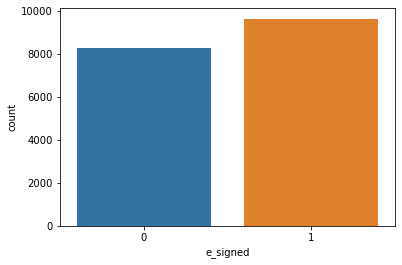

In [13]:
sns.countplot(dataset['e_signed'])

In [14]:
print((dataset.e_signed==1).sum())
print((dataset.e_signed==0).sum())

9639
8269


In [15]:
dataset['months_employeed']=(dataset['months_employed']+dataset['years_employed']*12)

In [16]:
dataset['pers_acc_months']=(dataset['personal_account_m']+ dataset['personal_account_y']*12)

In [17]:
dataset.head()

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months_employeed,pers_acc_months
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


In [18]:
dataset=dataset.drop(columns=['months_employed','years_employed','personal_account_m','personal_account_y'])

In [19]:
dataset.head()

,Entry_id,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months_employeed,pers_acc_months
0,7629673,40,1,3135,3,1,550,36200,0.737398,0.903517,...,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,3560428,61,0,3180,3,1,600,30150,0.738510,0.881027,...,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,6934997,23,0,1540,0,1,450,34550,0.642993,0.766554,...,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,5682812,40,0,5230,1,1,700,42150,0.665224,0.960832,...,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,5335819,33,0,3590,2,1,1100,53850,0.617361,0.857560,...,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


## Corr matrix

In [20]:
X=dataset.drop(columns=['Entry_id','e_signed'])

In [21]:
y=dataset['e_signed']

<AxesSubplot:title={'center':'Corr with e_signed'}>

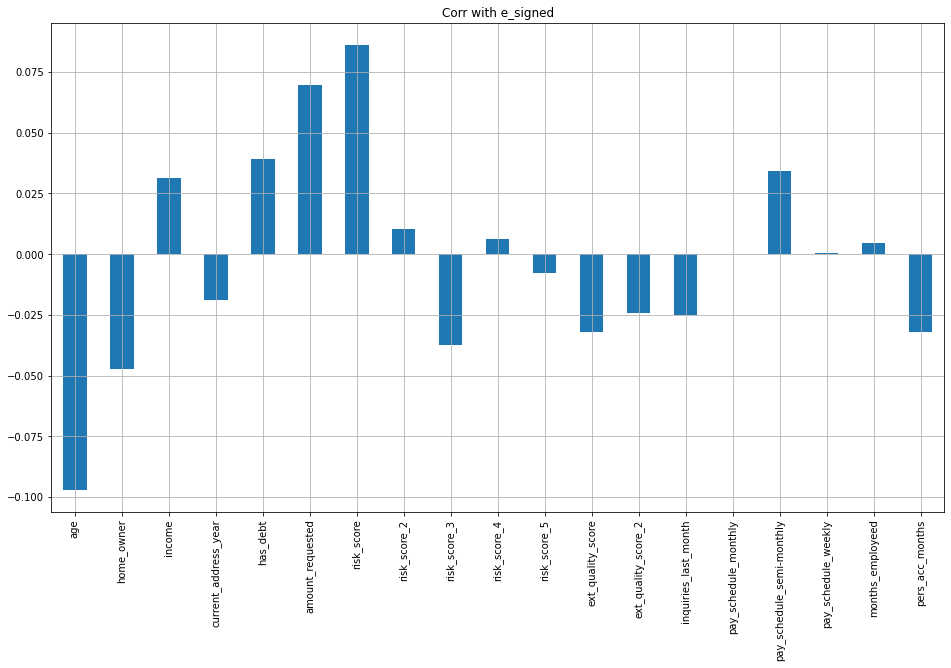

In [22]:
X.corrwith(y).plot.bar(
figsize=(16,9),title='Corr with e_signed',grid=True)

<AxesSubplot:>

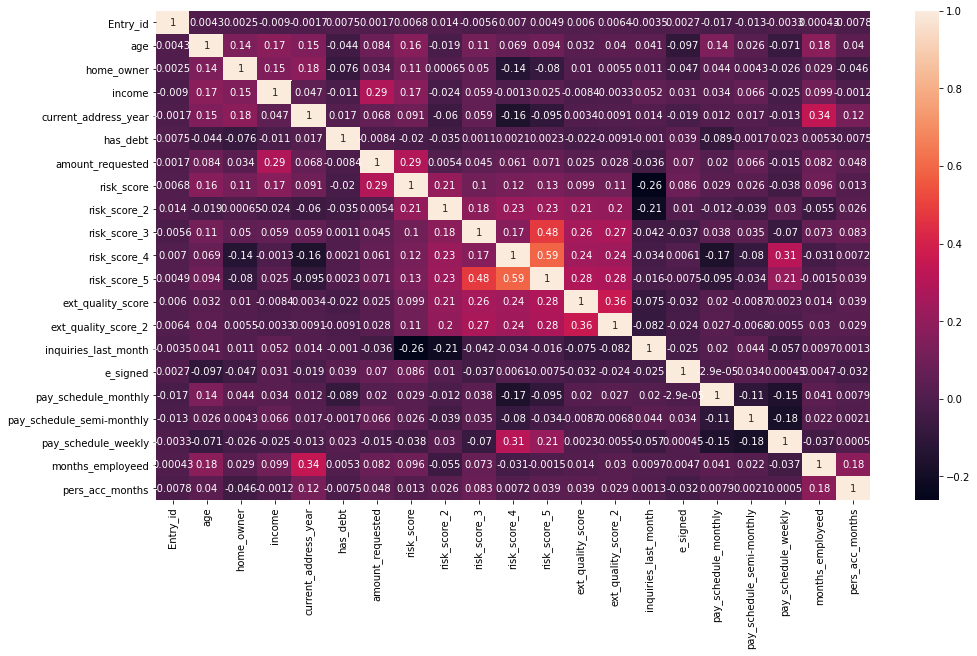

In [23]:
plt.figure(figsize=(16,9))
sns.heatmap(dataset.corr(),annot=True)

## Splitting the dataset

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(14326, 19)
(3582, 19)
(14326,)
(3582,)


## Feature scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [28]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Part 2: Building the model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model_logistic=LogisticRegression(random_state=0)
model_logistic.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [31]:
y_pred=model_logistic.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

In [33]:
accuracy_score(y_test,y_pred)

0.5628140703517588

In [34]:
confusion_matrix(y_test,y_pred)

array([[ 654, 1000],
       [ 566, 1362]], dtype=int64)

In [35]:
from sklearn.svm import SVC
model_svc=SVC(random_state=0)
model_svc.fit(X_train,y_train)

SVC(random_state=0)

In [36]:
y_pred=model_svc.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred)

0.5946398659966499

In [38]:
confusion_matrix(y_test,y_pred)

array([[ 797,  857],
       [ 595, 1333]], dtype=int64)

In [39]:
from sklearn.ensemble import RandomForestClassifier
model_rfc=RandomForestClassifier(random_state=0)
model_rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [40]:
y_pred=model_rfc.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred)

0.6323283082077052

In [42]:
confusion_matrix(y_test,y_pred)

array([[ 959,  695],
       [ 622, 1306]], dtype=int64)

In [43]:
from xgboost import XGBClassifier

In [44]:
model_xgb=XGBClassifier(random_state=0)

In [45]:
model_xgb.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:15:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
y_pred=model_xgb.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred)

0.628140703517588

In [48]:
confusion_matrix(y_test,y_pred)

array([[ 948,  706],
       [ 626, 1302]], dtype=int64)

# Applying Randomized Search

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
parameters ={
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth':[3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight':[1, 3, 5, 7],
    'gamma':[0.0, 0.1, 0.2 , 0.3, 0.4],
    'colsample_bytree':[0.3, 0.4, 0.5 , 0.7]
    }

In [51]:
randomized_search = RandomizedSearchCV(estimator = model_xgb, param_distributions = parameters,
                                 n_iter = 5, scoring='roc_auc', n_jobs = -1, cv = 5, verbose=3)


In [52]:
randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:15:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimat...
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, subs

In [53]:
randomized_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [54]:
randomized_search.best_params_

{'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [55]:
randomized_search.best_score_

0.6993944588041835

# Final part

In [56]:
from xgboost import XGBClassifier
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

classifier.fit(X_train, y_train)

[10:15:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [57]:
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

final_results = pd.DataFrame([['XGBoost', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


final_results

,Model,Accuracy,Precision,Recall,F1 Score
0,XGBoost,0.637074,0.654832,0.688797,0.671385


In [58]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:15:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:15:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:15:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:16:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:16:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:16:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:16:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:16:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:16:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:16:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy is 64.22 %
Standard Deviation is 1.32 %


In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 954  700]
 [ 600 1328]]
